<a href="https://colab.research.google.com/github/verryp/dts-deep-learning-project/blob/dev/Final_Project_DTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST DATASETS

---



Klasifikasi gambar digunakan dalam beberapa aplikasi, mulai dari mengenali penyakit
yang mengancam jiwa dalam pemindaian medis, hingga mendeteksi suatu hal


Dataset MNIST (biasa disebut) adalah dataset yang paling sering digunakan sebagai
permulaan pembelajaran klasifikasi gambar. Komunitas data saintis menyukai dataset ini
dan menggunakannya sebagai tolak ukur untuk melakukan validasi terhadap algoritma mereka. Faktanya,
MNIST seringkali menjadi dataset pertama para peneliti yang dicoba.



  >    "Jika algoritmanya tidak bisa bekerja pada MNIST, algoritma tersebut pasti tidak akan bisa bekerja untuk dataset lainnya. Jika algoritmanya bekerja pada MNIST, permulaan yang bagus, namun bukan berarti dapat bekerja untuk dataset lainnya."
  
  
Peneliti dari Zalando (sebuah perusahaan e-commerce) telah mengembangkan dataset
klasifikasi gambar baru yang disebut dengan Fashion MNIST dengan harapan dapat
menggantikan MNIST. Dataset baru ini berisi gambar baju dan aksesoris, seperti: kemeja,
tas, sepatu, dan barang mode lainnya.

Fashion MNIST berisi 55,000 training set dan 10,000 test set. Serupa dengan MNIST, setiap
data Fashion MNIST merupakan sebuah gambar skala abu (grayscale) berukuran 28x28
pixel. Masing-masing data memiliki label asosiasinya yang terdiri dari 10 kelas

Label|Description|Label|Description
--- | --- |--- | ---
0|T-shirt/top|5|Sandal
1|Trouser|6|Shirt
2|Pullover|7|Sneaker
3|Dress|8|Bag
4|Coat|9|Ankle boot

## Dependency & Data Preparation

### Download Datasets

In [188]:
!mkdir data/fashion
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

mkdir: cannot create directory ‘data/fashion’: File exists
--2019-08-18 17:52:40--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.73.198
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.73.198|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  7.39MB/s    in 3.4s    

2019-08-18 17:52:44 (7.39 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-08-18 17:52:45--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.ama

### Import Library

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import seaborn as sns

from tensorflow.keras.models import Sequential # JenisModel
from tensorflow.keras.layers import Dense #Sebuah lapisan untuk MLP -> bisa berupa layer input,hidden, ataupun output
from tensorflow.keras.utils import to_categorical #Mengubah label 0-9 menjadi representasi yang bisa diproses oleh keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.examples.tutorials.mnist import input_data #Dataset fashion mnist dari keras

### Get Dataset

In [190]:
# Import Fashion MNIST
fashion_mnist = input_data.read_data_sets('data/fashion')

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


## Preprocessing Data

### Show Data

In [191]:
# Shapes of training set
x_train, y_train = fashion_mnist.train.images, fashion_mnist.train.labels

print("Training set (images) shape: {shape}".format(shape=x_train.shape))
print("Training set (labels) shape: {shape}".format(shape=y_train.shape))

# Shapes of test set
x_test, y_test = fashion_mnist.test.images, fashion_mnist.test.labels
print("\nTest set (images) shape: {shape}".format(shape=x_test.shape))
print("Test set (labels) shape: {shape}".format(shape=y_test.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000,)

Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000,)


Random 10 image dari data training : 


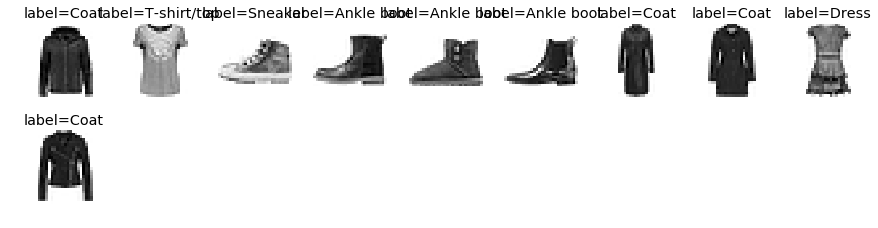

In [192]:
# Set label dalam bentuk huruf -> agar bisa dibaca dengan baik
class_names = {0:'T-shirt/top',
                  1:'Trouser',
                  2:'Pullover',
                  3:'Dress',
                  4:'Coat',
                  5:'Sandal',
                  6:'Shirt',
                  7:'Sneaker',
                  9:'Bag',
                  9:'Ankle boot'}

# proses menampilkan data dengan bantuan lib matplotlib
print("Random 10 image dari data training : ")
plt.figure(figsize=(15,10))
for i in range(10):  
    plt.subplot(5, 9, i+1)
    plt.imshow(
        x_train[i].reshape((28,28)),
        cmap=plt.cm.binary)
    plt.title("label=%s" % class_names[y_train[i]],y=1)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()

### Data Visualization

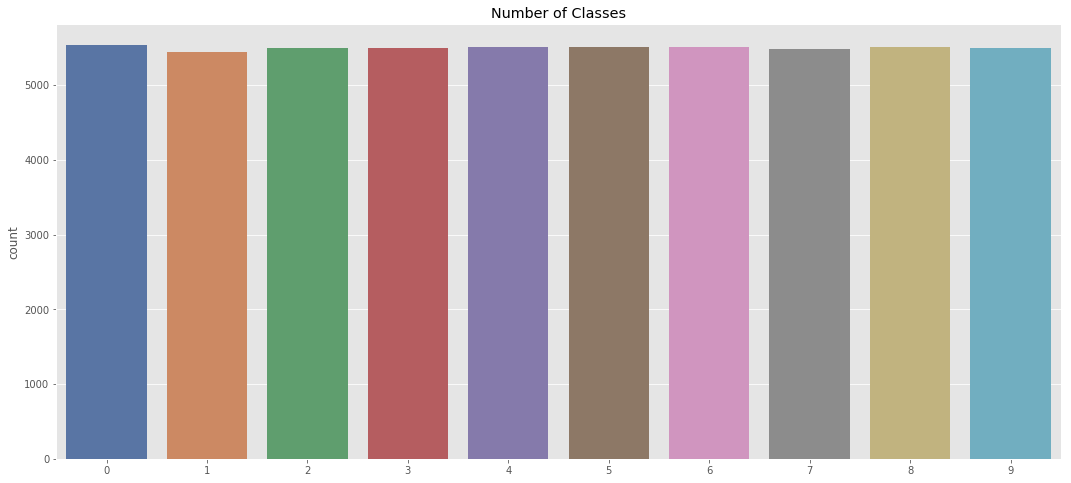

In [193]:
plt.figure(figsize=(18, 8))
sns.countplot(y_train, palette="deep")
plt.title("Number of Classes")
plt.show()

### Rescaling and Reshape Data

In [194]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('x_train shape : ', x_train.shape)
print('Banyak gambar di x_train : ', x_train.shape[0])

print('Banyak gambar di x_test', x_test.shape[0])

x_train shape :  (55000, 28, 28, 1)
Banyak gambar di x_train :  55000
Banyak gambar di x_test 10000


## Training Data

### Modeling Data CNN - 1

In [195]:
input_shape = (28, 28, 1)
adam = Adam(lr=0.001)

# ==========================================================BAGAIN PERTAMA========================================================
# # Membuat model
# model = Sequential()

# model.add(Conv2D(filters=64, 
#                  kernel_size=2, 
#                  padding='same', 
#                  activation='relu', 
#                  strides=1, 
#                  input_shape=input_shape))
# # Conv2D
# # - filters = jumlah node. mirip seperti Dense
# # - kernel_size = jumlah node yang bergeser. 2 artinya matrik 2x2
# # - strides = bergesernya pixel ke kanan sebanyak 1 kolom
# # - padding = merupakan garis putus (sisa/tambahan pixel dari hasil stride) untuk membantu proses perhitungan
# #       => value 'same' artinya padding akan diberikan sebagaimana hasil proses perhitungan sama dengan input 
# #       => input 28x28x1 maka menjadi 28x28x64. 28x28 tidak berubah karena 'same'

# model.add(MaxPooling2D(pool_size=2))
# # MaxPooling2D
# # - untuk memperkecil ukuran dari Conv2D dengan cara mengambil angka tersebar untuk setiap setingan pixel matrik dalam hal ini 2x2 dalam setiap proses
# # - dapat mencegah overfitting

# model.add(Flatten())
# # Flatten
# # - meratakan semua output dari layer sebelumnya sehingga bisa diproses menggunakan Dense
# # - hasil output MaxPool adalah 14x14x64 dan flatten akan meratakan menjadi 12.544 sel
# model.add(Dense(10, activation='softmax'))


# ==========================================================BAGAIN KEDUA========================================================
# Membuat CNN - 2
model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=3, 
                 padding='same', 
                 activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=3))

model.add(Dropout(0.05))
model.add(Conv2D(filters=64, 
                 kernel_size=3, 
                 padding='same', 
                 activation='relu'))

model.add(Dropout(0.05))
model.add(Conv2D(filters=128, 
                 kernel_size=3, 
                 padding='same', 
                 activation='relu'))

model.add(Dropout(0.1))
model.add(Flatten())

model.add(Dense(128, activation='relu',))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
dropout_55 (Dropout)         (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
dropout_56 (Dropout)         (None, 9, 9, 128)       

### Fitting Data

In [196]:
model.compile(
    optimizer = adam,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Training data dengan 50 epochs dan menggunakan TensorBoard Callback
history = model.fit(
    x_train, 
    y_train, 
    epochs=50, 
    validation_split=0.1, 
    batch_size=256)

Train on 49500 samples, validate on 5500 samples
Epoch 1/50
49500/49500 [==============================] - 4s 76us/sample - loss: 1.3599 - acc: 0.4931 - val_loss: 0.7123 - val_acc: 0.7365
Epoch 2/50
49500/49500 [==============================] - 3s 56us/sample - loss: 0.7286 - acc: 0.7231 - val_loss: 0.6259 - val_acc: 0.7602
Epoch 3/50
49500/49500 [==============================] - 3s 56us/sample - loss: 0.6685 - acc: 0.7446 - val_loss: 0.5734 - val_acc: 0.7895
Epoch 4/50
49500/49500 [==============================] - 3s 56us/sample - loss: 0.6168 - acc: 0.7669 - val_loss: 0.5313 - val_acc: 0.7964
Epoch 5/50
49500/49500 [==============================] - 3s 56us/sample - loss: 0.5658 - acc: 0.7862 - val_loss: 0.4976 - val_acc: 0.8095
Epoch 6/50
49500/49500 [==============================] - 3s 56us/sample - loss: 0.5265 - acc: 0.8024 - val_loss: 0.4699 - val_acc: 0.8255
Epoch 7/50
49500/49500 [==============================] - 3s 56us/sample - loss: 0.4946 - acc: 0.8155 - val_loss: 0.4

In [0]:
# model.optimizer.lr = 0.0001

# history = model.fit(
#     x_train, 
#     y_train, 
#     epochs=50, 
#     validation_split=0.1, 
#     batch_size=256,
# )

### Prediction Data

In [198]:
print("Accuracy after fitting: {:.2f}%".format(history.history['acc'][-1]*100))

score = model.evaluate(x_test, y_test)
print('\nTest Accurary : {:.2f}%'.format(score[1]*100))
print('Test Lost : {:.3f}'.format(score[0]) )

Accuracy after fitting: 90.78%
10000/10000 [==============================] - 1s 81us/sample - loss: 0.2841 - acc: 0.8980

Test Accurary : 89.80%
Test Lost : 0.284


## Evaluating Data

### Confusion Matrix

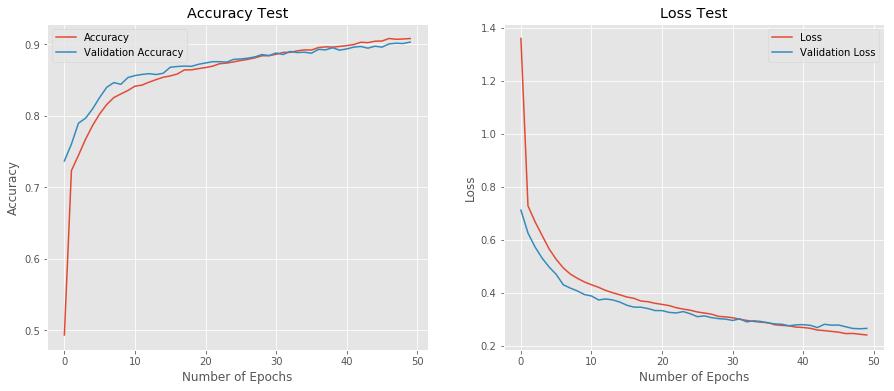

In [199]:
# #EVALUATING - VISUALISASI HASIL
plt.figure(figsize=(15,6))

plt.subplot(1,2,2)
plt.title('Loss Test')
plt.plot(history.history['loss'], label = "Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

plt.subplot(1,2,1)
plt.title('Accuracy Test')
plt.plot(history.history['acc'], label = "Accuracy")
plt.plot(history.history['val_acc'], label = "Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()
plt.show()

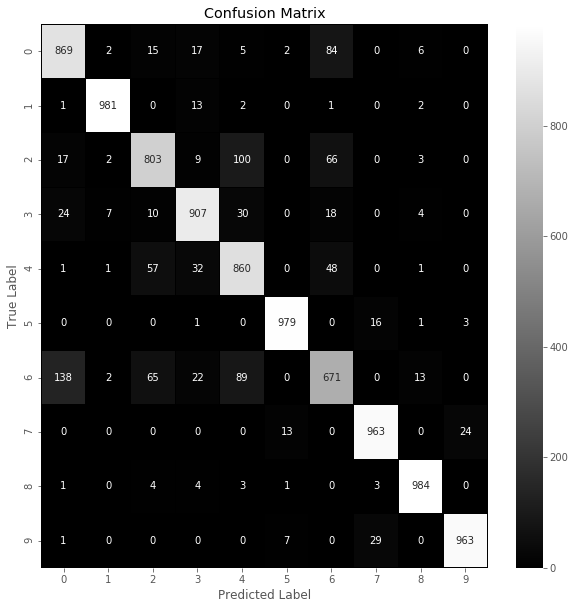



Class: T-shirt/top
Number of Correct Prediction: 869 out of  10000
Number of Wrong Prediction: 131 out of  10000

Class: Trouser
Number of Correct Prediction: 981 out of  10000
Number of Wrong Prediction: 19 out of  10000

Class: Pullover
Number of Correct Prediction: 803 out of  10000
Number of Wrong Prediction: 197 out of  10000

Class: Dress
Number of Correct Prediction: 907 out of  10000
Number of Wrong Prediction: 93 out of  10000

Class: Coat
Number of Correct Prediction: 860 out of  10000
Number of Wrong Prediction: 140 out of  10000

Class: Sandal
Number of Correct Prediction: 979 out of  10000
Number of Wrong Prediction: 21 out of  10000

Class: Shirt
Number of Correct Prediction: 671 out of  10000
Number of Wrong Prediction: 329 out of  10000

Class: Sneaker
Number of Correct Prediction: 963 out of  10000
Number of Wrong Prediction: 37 out of  10000

Class: Bag
Number of Correct Prediction: 984 out of  10000
Number of Wrong Prediction: 16 out of  10000

Class: Ankle boot
Nu

In [200]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Plot Confusion Matrix
prediction = model.predict(x_test)
Y_pred_classes = np.argmax(prediction, axis = 1)
Y_true = np.argmax(y_test, axis = 1)
confusionMatrix = confusion_matrix(Y_true, Y_pred_classes)


f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(confusionMatrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print('\n', '=='*70)

# For loop to print how many items of each class have been incorrectly estimated
for i in range(len(confusionMatrix)):
    print("\nClass:",str(class_names[i]))
    print("Number of Correct Prediction:", str(confusionMatrix[i][i]), "out of ", len(x_test))
    print("Number of Wrong Prediction:", str(sum(confusionMatrix[i])-confusionMatrix[i][i]), "out of ", len(x_test))
    

print('\n','=='*70)

print('\nClassification accuracy for each class:');
for i,j in enumerate(confusionMatrix.diagonal()/confusionMatrix.sum(axis=1)): print(str(class_names[i]), ': %.4f' % j)

### Accuracy, Precision, Recall, and F1 Model

In [212]:
print(classification_report(Y_true, Y_pred_classes,
	target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.84      0.80      0.82      1000
       Dress       0.90      0.91      0.90      1000
        Coat       0.79      0.86      0.82      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.76      0.67      0.71      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### Visualization of results

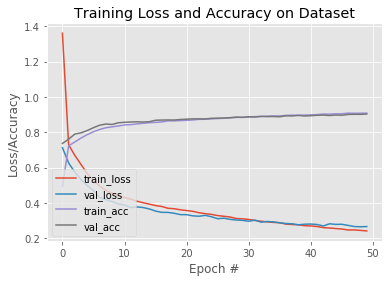

In [202]:
# plot the training loss and accuracy
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

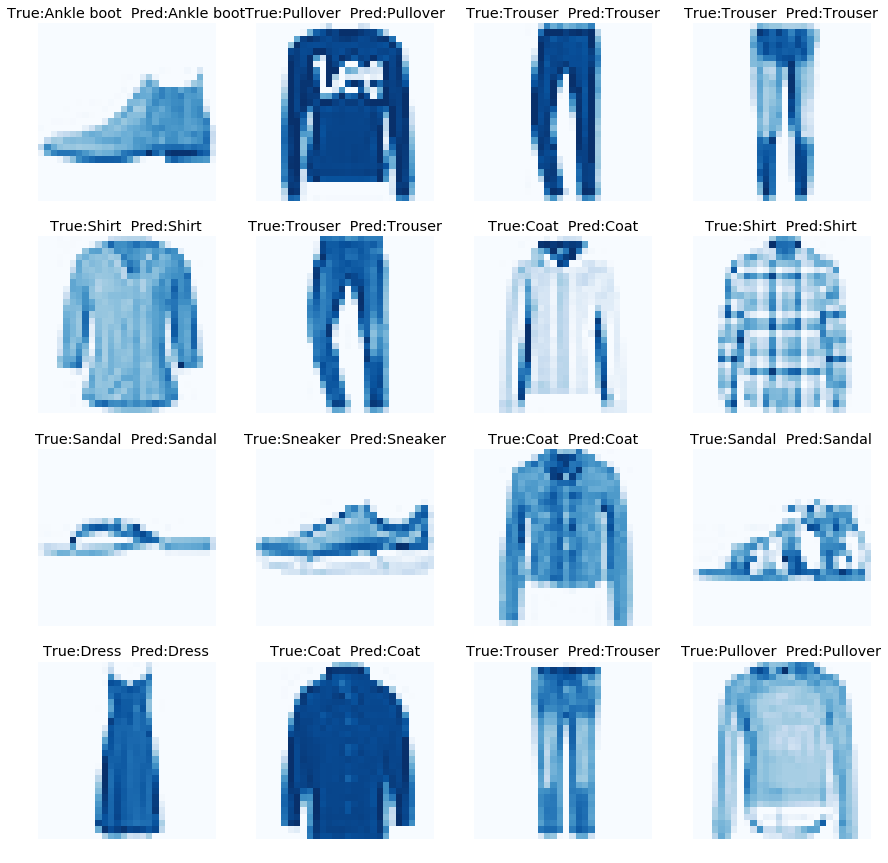

In [218]:
labels = {0:'T-shirt/top',
                  1:'Trouser',
                  2:'Pullover',
                  3:'Dress',
                  4:'Coat',
                  5:'Sandal',
                  6:'Shirt',
                  7:'Sneaker',
                  9:'Bag',
                  9:'Ankle boot'}

def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(x_test[indx].reshape(28,28), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[Y_true[indx]],labels[Y_pred_classes[indx]]))
    plt.show() 

correct = np.nonzero(Y_true == Y_pred_classes)[0]
plot_images(correct)

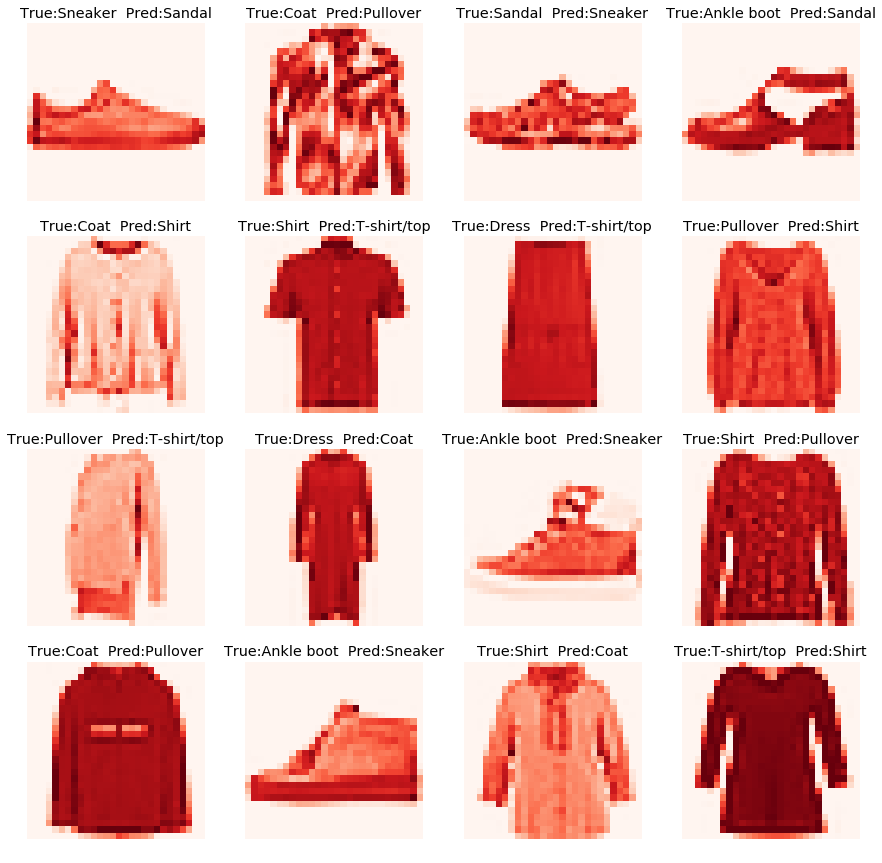

In [220]:
incorrect = np.nonzero(Y_true != Y_pred_classes)[0]
plot_images(incorrect, 'Reds')

## Sumber

1.   https://github.com/zalandoresearch/fashion-mnist
2.   https://medium.com/tensorist/classifying-fashion-articles-using-tensorflow-fashion-mnist-f22e8a04728a

